In [2]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 

In [3]:
img_width = 256
img_height = 256
batch_size = 32 

In [4]:
new_dir = r"D:\Saaswath\monday projects\Power\power line\d\train\power line"
train_images = []
count = 0
import cv2 as cv
import os
import numpy as np
from matplotlib import pyplot as plt
file_names = [i for i in os.listdir(new_dir)]
for i in file_names:
    img = cv.imread(r"D:\Saaswath\monday projects\Power\power line\d\train\power line\{}".format(i),0)
    img = cv.medianBlur(img,5)
    th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
    images = "D:/Saaswath/monday projects/Power\power line/d/"+str(count)+".jpg"
    cv.imwrite(images,th2)
    count+=1
print("Images Appended!")

Images Appended!


In [4]:
train_data_dir = r"D:\Saaswath\monday projects\Power\power line\source code\dataset\train"

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode = 'grayscale',
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode ="grayscale",
    subset='validation')

Found 1280 images belonging to 1 classes.
Found 320 images belonging to 1 classes.


In [6]:
EPOCHS = 5
STEPS = 100
LR = 1e-3 
BATCH_SIZE = 32
WIDTH = 256
HEIGHT = 256
DEPTH = 1

In [7]:
from keras.layers import Convolution2D,Activation,MaxPooling2D,GlobalAveragePooling2D,concatenate,Input,Dropout
from keras.models import Model

In [8]:
sq1x1 = "squeeze1x1"
exp1x1 = "expand1x1"
exp3x3 = "expand3x3"
relu = "relu_"

def fire_module(x, fire_id, squeeze=16, expand=64):
       s_id = 'fire' + str(fire_id) + '/'
       x = Convolution2D(squeeze, (1, 1), padding='valid', name=s_id + sq1x1)(x)
       x = Activation('relu', name=s_id + relu + sq1x1)(x)

       left = Convolution2D(expand, (1, 1), padding='valid', name=s_id + exp1x1)(x)
       left = Activation('relu', name=s_id + relu + exp1x1)(left)

       right = Convolution2D(expand, (3, 3), padding='same', name=s_id + exp3x3)(x)
       right = Activation('relu', name=s_id + relu + exp3x3)(right)

       x = concatenate([left, right], axis=3, name=s_id + 'concat')
       return x

In [9]:
input_shape=(256,256,1)
nb_classes= 1
img_input = Input(shape=input_shape)
x = Convolution2D(64, (3, 3), strides=(2, 2), padding='valid', name='conv1')(img_input)
x = Activation('relu', name='relu_conv1')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1')(x)
        
x = fire_module(x, fire_id=2, squeeze=16, expand=64)
x = fire_module(x, fire_id=3, squeeze=16, expand=64)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3')(x)
        
x = fire_module(x, fire_id=4, squeeze=32, expand=128)
x = fire_module(x, fire_id=5, squeeze=32, expand=128)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool5')(x)
        
x = fire_module(x, fire_id=6, squeeze=48, expand=192)
x = fire_module(x, fire_id=7, squeeze=48, expand=192)
x = fire_module(x, fire_id=8, squeeze=64, expand=256)
x = fire_module(x, fire_id=9, squeeze=64, expand=256)
x = Dropout(0.5, name='drop9')(x)
        
x = Convolution2D(nb_classes, (1, 1), padding='valid', name='conv10')(x)
x = Activation('relu', name='relu_conv10')(x)
x = GlobalAveragePooling2D()(x)
out = Activation('softmax', name='loss')(x)

model = Model(img_input, out, name='squeezenet')
model.summary()  

Model: "squeezenet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 127, 127, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 relu_conv1 (Activation)        (None, 127, 127, 64  0           ['conv1[0][0]']                  
                                )                                                        

In [10]:
model.compile(optimizer='rmsprop',loss="mean_squared_logarithmic_error",metrics=["accuracy"])
model.fit(train_generator,validation_data=validation_generator,batch_size=BATCH_SIZE,epochs=EPOCHS,steps_per_epoch = train_generator.samples // batch_size,validation_steps = validation_generator.samples // batch_size)

Epoch 1/5
40/40 [==============================] - 391s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
40/40 [==============================] - 374s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 429s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 396s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
40/40 [==============================] - 375s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


10/10 [==============================] - 33s 3s/step


c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_ranking.py:1007: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


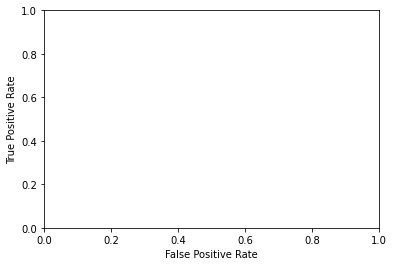

'              precision    recall  f1-score   support\n\n         1.0       1.00      1.00      1.00       320\n\n    accuracy                           1.00       320\n   macro avg       1.00      1.00      1.00       320\nweighted avg       1.00      1.00      1.00       320\n'

In [15]:
y_val_cat_prob=model.predict(validation_generator)
y_true = np.ones((320,1))
from sklearn.metrics import roc_curve,classification_report
import matplotlib.pyplot as plt
fpr , tpr , thresholds = roc_curve (y_true , y_val_cat_prob)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 
classification_report(y_true,y_val_cat_prob)

In [26]:
model.save("./squeezenet.h5")

In [ ]:
from tensorflow.keras.models import Model
from keras.models import load_model
base_model = load_model("./squeezenet.h5")
model = Model(inputs=base_model.input,outputs=base_model.get_layer('fire2/expand3x3').output)
img_path = r'D:\Saaswath\monday projects\Power\power line\source code\dataset\v\170810.jpg'
img = image.load_img(img_path,target_size=(256,256))
x = image.img_to_array(img)
x =np.expand_dims(x,axis=0)
x =preprocess_input(x)
block3a_dwconv_pad = model.predict(x)

## Implementation of Enet

In [27]:
import tensorflow as tf
from tensorflow.python.keras.utils import conv_utils

# Tensorflow implementations of max_pooling and unpooling


# Keras layers for pooling and unpooling
class MaxPoolWithArgmax2D(tf.keras.layers.Layer):
    """2D Pooling layer with pooling indices.
    Arguments
    ----------
    'pool_size' = An integer or tuple/list of 2 integers:
        (pool_height, pool_width) specifying the size of the
        pooling window. Can be a single integer to specify
        the same value for all spatial dimensions.
    'strides' = An integer or tuple/list of 2 integers,
        specifying the strides of the pooling operation.
        Can be a single integer to specify the same value for
        all spatial dimensions.
    'padding' = A string. The padding method, either 'valid' or 'same'.
        Case-insensitive.
    'data_format' = A string, one of `channels_last` (default)
        or `channels_first`. The ordering of the dimensions in the inputs.
        `channels_last` corresponds to inputs with shape
        `(batch, height, width, channels)` while `channels_first` corresponds
        to inputs with shape `(batch, channels, height, width)`.
    'name' = A string, the name of the layer.
    """
    def __init__(self,
                 pool_size,
                 strides,
                 padding='valid',
                 data_format=None,
                 name=None,
                 **kwargs):
        super(MaxPoolWithArgmax2D, self).__init__(name=name, **kwargs)
        if data_format is None:
            data_format = tf.keras.backend.image_data_format()
        if strides is None:
            strides = pool_size
        self.pool_size = conv_utils.normalize_tuple(pool_size, 2, 'pool_size')
        self.strides = conv_utils.normalize_tuple(strides, 2, 'strides')
        self.padding = conv_utils.normalize_padding(padding)
        self.data_format = conv_utils.normalize_data_format(data_format)
        self.input_spec = tf.keras.layers.InputSpec(ndim=4)

    def call(self, inputs):

        pool_shape = (1, ) + self.pool_size + (1, )
        strides = (1, ) + self.strides + (1, )

        if self.data_format == 'channels_last':
            outputs, argmax = tf.nn.max_pool_with_argmax(
                inputs,
                ksize=pool_shape,
                strides=strides,
                padding=self.padding.upper())
            return (outputs, argmax)
        else:
            outputs, argmax = tf.nn.max_pool_with_argmax(
                tf.transpose(inputs, perm=[0, 2, 3, 1]),
                ksize=pool_shape,
                strides=strides,
                padding=self.padding.upper())
            return (tf.transpose(outputs, perm=[0, 3, 1, 2]),
                    tf.transpose(argmax, perm=[0, 3, 1, 2]))

    def compute_output_shape(self, input_shape):
        input_shape = tf.TensorShape(input_shape).as_list()
        if self.data_format == 'channels_first':
            rows = input_shape[2]
            cols = input_shape[3]
        else:
            rows = input_shape[1]
            cols = input_shape[2]
        rows = conv_utils.conv_output_length(rows, self.pool_size[0],
                                             self.padding, self.strides[0])
        cols = conv_utils.conv_output_length(cols, self.pool_size[1],
                                             self.padding, self.strides[1])
        if self.data_format == 'channels_first':
            return tf.TensorShape([input_shape[0], input_shape[1], rows, cols])
        else:
            return tf.TensorShape([input_shape[0], rows, cols, input_shape[3]])

    def get_config(self):
        config = {
            'pool_size': self.pool_size,
            'padding': self.padding,
            'strides': self.strides,
            'data_format': self.data_format
        }
        base_config = super(MaxPoolingWithArgmax2D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class MaxUnpool2D(tf.keras.layers.Layer):
    def __init__(self, data_format='channels_last', name=None, **kwargs):
        super(MaxUnpool2D, self).__init__(**kwargs)
        if data_format is None:
            data_format = tf.keras.backend.image_data_format()
        self.data_format = conv_utils.normalize_data_format(data_format)
        self.input_spec = tf.keras.layers.InputSpec(min_ndim=2, max_ndim=4)

    def call(self, inputs, argmax, spatial_output_shape):

        # standardize spatial_output_shape
        spatial_output_shape = conv_utils.normalize_tuple(
            spatial_output_shape, 2, 'spatial_output_shape')

        # getting input shape
        # input_shape = tf.shape(inputs)
        # input_shape = inputs.get_shape().as_list()
        input_shape = tf.shape(inputs)

        # checking if spatial shape is ok
        if self.data_format == 'channels_last':
            output_shape = (input_shape[0],) + \
                spatial_output_shape + (input_shape[3],)

            # assert output_shape[1] * output_shape[2] * output_shape[
            #     3] > tf.math.reduce_max(argmax).numpy(), "HxWxC <= Max(argmax)"
        else:
            output_shape = (input_shape[0],
                            input_shape[1]) + spatial_output_shape
            # assert output_shape[1] * output_shape[2] * output_shape[
            #     3] > tf.math.reduce_max(argmax).numpy(), "CxHxW <= Max(argmax)"

        # N * H_in * W_in * C
        # flat_input_size = tf.reduce_prod(input_shape)
        flat_input_size = tf.reduce_prod(input_shape)

        # flat output_shape = [N, H_out * W_out * C]
        flat_output_shape = [
            output_shape[0],
            output_shape[1] * output_shape[2] * output_shape[3]
        ]

        # flatten input tensor for the use in tf.scatter_nd
        inputs_ = tf.reshape(inputs, [flat_input_size])

        # create the tensor [ [[[0]]], [[[1]]], ..., [[[N-1]]] ]
        # corresponding to the batch size but transposed in 4D
        batch_range = tf.reshape(tf.range(tf.cast(output_shape[0], tf.int64),
                                          dtype=argmax.dtype),
                                 shape=[input_shape[0], 1, 1, 1])

        # b is a tensor of size (N, H, W, C) or (N, C, H, W) whose
        # first element of the batch are 3D-array full of 0, ...
        # second element of the batch are 3D-array full of 1, ...
        b = tf.ones_like(argmax) * batch_range
        b = tf.reshape(b, [flat_input_size, 1])

        # argmax_ = [ [0, argmax_1], [0, argmax_2], ... [0, argmax_k], ...,
        # [N-1, argmax_{N*H*W*C}], [N-1, argmax_{N*H*W*C-1}] ]
        argmax_ = tf.reshape(argmax, [flat_input_size, 1])
        argmax_ = tf.concat([b, argmax_], axis=-1)

        # reshaping output tensor
        ret = tf.scatter_nd(argmax_,
                            inputs_,
                            shape=tf.cast(flat_output_shape, tf.int64))
        ret = tf.reshape(ret, output_shape)

        return ret

    def compute_output_shape(self, input_shape, spatial_output_shape):

        # getting input shape
        input_shape = tf.shape(input_shape)

        # standardize spatial_output_shape
        spatial_output_shape = conv_utils.normalize_tuple(
            spatial_output_shape, 2, 'spatial_output_shape')

        # checking if spatial shape is ok
        if self.data_format == 'channels_last':
            output_shape = (input_shape[0],) + \
                self.spatial_output_shape + (input_shape[3],)
            # assert output_shape[1] * output_shape[2] > tf.math.reduce_max(
            #     self.argmax).numpy(), "HxW <= Max(argmax)"
        else:
            output_shape = (input_shape[0],
                            input_shape[1]) + self.spatial_output_shape
            # assert output_shape[2] * output_shape[3] > tf.math.reduce_max(
            #     self.argmax).numpy(), "HxW <= Max(argmax)"

        return output_shape

    def get_config(self):
        config = {
            'spatial_output_shape': self.spatial_output_shape,
            'data_format': self.data_format
        }
        base_config = super(MaxPoolingWithArgmax2D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class BottleNeck(tf.keras.Model):
    '''
    Enet bottleneck module as in:
    (1) Paszke, A.; Chaurasia, A.; Kim, S.; Culurciello, E. ENet: A Deep Neural
        Network Architecture for Real-Time Semantic Segmentation.
        arXiv:1606.02147 [cs] 2016.
    This is the general bottleneck modules. It is used both in the encoding and
    decoding paths, the only exception being the upsampling decoding, where
    we use BottleDeck
    Arguments
    ----------
    'output_filters' = an `Integer`: number of output filters
    'kernel_size' = a `List`: size of the kernel for the central convolution
    'kernel_strides' = a `List`: length of the strides for the central conv
    'padding' = a `String`: padding of the central convolution
    'dilation_rate' = a `List`: dilation rate of the central convolution
    'internal_comp_ratio' = an `Integer`: compression ratio of the bottleneck
    'dropout_prob' = a `float`: dropout at the end of the main connection
    'downsample' = a `String`: downsampling flag
    'name' = a `String`: name of the bottleneck
    Returns
    -------
    'output_layer' = A `Tensor` with the same type as `input_layer`
    '''
    def __init__(self,
                 output_filters=256,
                 kernel_size=[3, 3],
                 kernel_strides=[1, 1],
                 padding='same',
                 dilation_rate=[1, 1],
                 internal_comp_ratio=4,
                 dropout_prob=0.1,
                 l2=0.0,
                 downsample=False,
                 name='BottleEnc',
                 **kwargs):
        super(BottleNeck, self).__init__(name=name, **kwargs)

        # ------- bottleneck parameters -------
        self.output_filters = output_filters
        self.kernel_size = kernel_size
        self.kernel_strides = kernel_strides
        self.padding = padding
        self.dilation_rate = dilation_rate
        self.internal_comp_ratio = internal_comp_ratio
        self.dropout_prob = dropout_prob
        self.l2 = l2
        self.downsample = downsample

        # Derived parameters
        self.internal_filters = self.output_filters // self.internal_comp_ratio
        if self.internal_filters == 0:
            self.internal_filters = 1

        # downsampling or not
        if self.downsample:
            self.down_kernel = [2, 2]
            self.down_strides = [2, 2]
        else:
            self.down_kernel = [1, 1]
            self.down_strides = [1, 1]

        # ------- main connection layers -------

        # bottleneck representation compression with valid padding
        # 1x1 usually, 2x2 if downsampling
        self.ConvIn = tf.keras.layers.Conv2D(
            self.internal_filters,
            self.down_kernel,
            strides=self.down_strides,
            use_bias=False,
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name=self.name + '.' + 'ConvIn')
        self.BNormIn = tf.keras.layers.BatchNormalization(name=self.name +
                                                          '.' + 'BNormIn')
        self.PreLuIn = tf.keras.layers.PReLU(name=self.name + '.' + 'PreLuIn')

        # central convolution
        self.asym_flag = self.kernel_size[0] != self.kernel_size[1]
        self.ConvMain = tf.keras.layers.Conv2D(
            self.internal_filters,
            self.kernel_size,
            strides=self.kernel_strides,
            padding=self.padding,
            dilation_rate=self.dilation_rate,
            use_bias=not (self.asym_flag),
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name=self.name + '.' + 'ConvMain')
        if self.asym_flag:
            self.ConvMainAsym = tf.keras.layers.Conv2D(
                self.internal_filters,
                self.kernel_size[::-1],
                strides=self.kernel_strides,
                padding=self.padding,
                dilation_rate=self.dilation_rate,
                kernel_regularizer=tf.keras.regularizers.l2(l2),
                name=self.name + '.' + 'ConvMainAsym')
        self.BNormMain = tf.keras.layers.BatchNormalization(name=self.name +
                                                            '.' + 'BNormMain')
        self.PreLuMain = tf.keras.layers.PReLU(name=self.name + '.' +
                                               'PreLuMain')

        # bottleneck representation expansion with 1x1 valid convolution
        self.ConvOut = tf.keras.layers.Conv2D(
            self.output_filters, [1, 1],
            strides=[1, 1],
            use_bias=False,
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name=self.name + '.' + 'ConvOut')
        self.BNormOut = tf.keras.layers.BatchNormalization(name=self.name +
                                                           '.' + 'BNormOut')
        self.DropOut = tf.keras.layers.SpatialDropout2D(dropout_prob,
                                                        name=self.name + '.' +
                                                        'DropOut')

        # ------- skip connection layers -------

        # downsampling layer
        self.ArgMaxSkip = MaxPoolWithArgmax2D(pool_size=self.down_kernel,
                                              strides=self.down_strides,
                                              name=self.name + '.' +
                                              'ArgMaxSkip')

        # matching filter dimension with learned 1x1 convolution
        # this is done differently than in vanilla enet, where
        # you shold just pad with zeros.
        self.ConvSkip = tf.keras.layers.Conv2D(
            self.output_filters,
            kernel_size=[1, 1],
            padding='valid',
            use_bias=False,
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name=name + '.' + 'ConvSkip')

        # ------- output layer -------
        self.AddMainSkip = tf.keras.layers.Add(name=self.name + '.' +
                                               'AddSkip')
        self.PreLuMainSkip = tf.keras.layers.PReLU(name=self.name + '.' +
                                                   'PreLuSkip')

    def call(self, input_layer):

        # input filter from incoming layer
        input_filters = input_layer.get_shape().as_list()[-1]

        # ----- main connection ------
        # Bottleneck in
        main = self.ConvIn(input_layer)
        main = self.BNormIn(main)
        main = self.PreLuIn(main)

        # Bottleneck main
        main = self.ConvMain(main)
        if self.asym_flag:
            main = self.ConvMainAsym(main)
        main = self.BNormMain(main)
        main = self.PreLuMain(main)

        # Bottleneck out
        main = self.ConvOut(main)
        main = self.BNormOut(main)
        main = self.DropOut(main)

        # ----- skip connection ------
        skip = input_layer

        # downsampling if necessary
        if self.downsample:
            skip, argmax = self.ArgMaxSkip(input_layer)

        # matching filter dimension with learned 1x1 convolution
        # this is done differently than in vanilla enet, where
        # you should just pad with zeros.
        if input_filters != self.output_filters:
            skip = self.ConvSkip(skip)

        # ------- output layer -------
        addition_layer = self.AddMainSkip([main, skip])
        output_layer = self.PreLuMainSkip(addition_layer)

        # I need the input layer, I see no other way round
        # because i neet to pass it to the decoder
        if self.downsample:
            return output_layer, argmax, input_layer
        else:
            return output_layer


class BottleDeck(tf.keras.Model):
    '''
    Enet bottleneck module as in:
    (1) Paszke, A.; Chaurasia, A.; Kim, S.; Culurciello, E. ENet: A Deep Neural
        Network Architecture for Real-Time Semantic Segmentation.
        arXiv:1606.02147 [cs] 2016.
    
    This is the general bottleneck decoding modules. It is used only in the
    decoding path when we use the upsampling. In the forward pass we have
    three input tensors:
    - input: the real input tensor
    - enc_tensor: coming from the encoder path, used to get the shape of the
                 output tensor
    - argmax: the tensor for the mapping of the upsampled values
    Arguments
    ----------
    'output_filters' = an `Integer`: number of output filters
    'kernel_size' = a `List`: size of the kernel for the central convolution
    'kernel_strides' = a `List`: length of the strides for the central conv
    'padding' = a `String`: padding of the central convolution
    'dilation_rate' = a `List`: dilation rate of the central convolution
    'internal_comp_ratio' = an `Integer`: compression ratio of the bottleneck
    'dropout_prob' = a `float`: dropout at the end of the main connection
    'name' = a `String`: name of the bottleneck
    Returns
    -------
    'output_layer' = A `Tensor` with the same type as `input_layer`
    '''
    def __init__(self,
                 output_filters=128,
                 kernel_size=[3, 3],
                 kernel_strides=[2, 2],
                 padding='same',
                 dilation_rate=[1, 1],
                 internal_comp_ratio=4,
                 dropout_prob=0.1,
                 l2=0.0,
                 name='BottleDeck',
                 **kwargs):
        super(BottleDeck, self).__init__(name=name, **kwargs)

        # ------- bottleneck parameters -------
        self.output_filters = output_filters
        self.kernel_size = kernel_size
        self.kernel_strides = kernel_strides
        self.padding = padding
        self.dilation_rate = dilation_rate
        self.internal_comp_ratio = internal_comp_ratio
        self.dropout_prob = dropout_prob
        self.l2 = l2

        # Derived parameters
        self.internal_filters = self.output_filters // self.internal_comp_ratio
        if self.internal_filters == 0:
            self.internal_filters = 1

        # ------- main connection layers -------

        # bottleneck representation compression with valid padding
        # 1x1 usually, 2x2 if downsampling
        self.ConvIn = tf.keras.layers.Conv2D(
            self.internal_filters,
            kernel_size=[1, 1],
            strides=[1, 1],
            use_bias=False,
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name=self.name + '.' + 'ConvIn')
        self.BNormIn = tf.keras.layers.BatchNormalization(name=self.name +
                                                          '.' + 'BNormIn')
        self.PreLuIn = tf.keras.layers.PReLU(name=self.name + '.' + 'PreLuIn')

        # central convolution: am i using "same" padding?
        self.ConvMain = tf.keras.layers.Conv2DTranspose(
            self.internal_filters,
            self.kernel_size,
            strides=self.kernel_strides,
            padding=self.padding,
            dilation_rate=self.dilation_rate,
            use_bias=True,
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name=self.name + '.' + 'ConvMain')
        self.BNormMain = tf.keras.layers.BatchNormalization(name=self.name +
                                                            '.' + 'BNormMain')
        self.PreLuMain = tf.keras.layers.PReLU(name=self.name + '.' +
                                               'PreLuMain')

        # bottleneck representation expansion with 1x1 valid convolution
        self.ConvOut = tf.keras.layers.Conv2D(
            self.output_filters, [1, 1],
            strides=[1, 1],
            use_bias=False,
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name=self.name + '.' + 'ConvOut')
        self.BNormOut = tf.keras.layers.BatchNormalization(name=self.name +
                                                           '.' + 'BNormOut')
        self.DropOut = tf.keras.layers.SpatialDropout2D(dropout_prob,
                                                        name=self.name + '.' +
                                                        'DropOut')

        # ------- skip connection layers -------

        # convolution for the upsampling. It comes before the
        # unpooling layer.
        self.ConvSkip = tf.keras.layers.Conv2D(
            self.output_filters,
            kernel_size=[1, 1],
            padding='valid',
            use_bias=False,
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name=name + '.' + 'ConvSkip')

        # downsampling layer
        self.MaxUnpoolSkip = MaxUnpool2D(name=self.name + '.' +
                                         'MaxUnpoolSkip')

        # ------- output layer -------
        self.AddMainSkip = tf.keras.layers.Add(name=self.name + '.' +
                                               'AddMainSkip')
        self.PreluMainSkip = tf.keras.layers.PReLU(name=self.name + '.' +
                                                   'PreluMainSkip')

    def call(self, input_layer, argmax, upsample_layer):

        # input filter from incoming layer, and upsample layer spatial shape
        input_filters = input_layer.get_shape().as_list()[-1]
        upsample_layer_shape = upsample_layer.get_shape().as_list()[1:3]

        # ----- main connection ------
        # Bottleneck in
        main = self.ConvIn(input_layer)
        main = self.BNormIn(main)
        main = self.PreLuIn(main)

        # Bottleneck main
        main = self.ConvMain(main)
        main = self.BNormMain(main)
        main = self.PreLuMain(main)

        main = self.ConvOut(main)
        main = self.BNormOut(main)
        main = self.DropOut(main)

        # ----- skip connection ------
        # matching channels before applying MaxUnpool
        skip = self.ConvSkip(input_layer)

        # downsampling if necessary
        skip = self.MaxUnpoolSkip(skip, argmax, upsample_layer_shape)

        # ------- output layer -------
        addition_layer = self.AddMainSkip([main, skip])
        output_layer = self.PreluMainSkip(addition_layer)

        return output_layer


class InitBlock(tf.keras.Model):
    '''
    Enet init_block as in:
    (1) Paszke, A.; Chaurasia, A.; Kim, S.; Culurciello, E. ENet: A Deep Neural Network
        Architecture for Real-Time Semantic Segmentation. arXiv:1606.02147 [cs] 2016.
    ----------
    'conv_filters' = an `Integer`: number filters for the convolution
    'kernel_size' = a `List`: size of the kernel for the convolution
    'kernel_strides' = a `List`: length of the strides for the convolution
    'pool_size' = a `List`: size of the pool for the maxpooling
    'pool_strides' = a `List`: length of the strides for the maxpooling
    'padding' = a `String`: padding for the convolution and the maxpooling
    'name' = a `String`: name of the init_block
    '''
    def __init__(self,
                 conv_filters=13,
                 kernel_size=[3, 3],
                 kernel_strides=[2, 2],
                 pool_size=[2, 2],
                 pool_strides=[2, 2],
                 padding='valid',
                 l2=0.0,
                 name='init_block',
                 **kwargs):
        super(InitBlock, self).__init__(name=name, **kwargs)

        # ------- init_block parameters -------
        self.conv_filters = conv_filters
        self.kernel_size = kernel_size
        self.kernel_strides = kernel_strides
        self.pool_size = pool_size
        self.pool_strides = pool_strides
        self.padding = padding

        # ------- init_block layers -------

        # conv connection: need the padding to match the dimension of pool_init
        self.padded_init = tf.keras.layers.ZeroPadding2D()
        self.conv_init = tf.keras.layers.Conv2D(
            conv_filters,
            kernel_size,
            strides=kernel_strides,
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            padding='valid')

        # maxpool, where pool_init is to be concatenated with conv_init
        self.pool_init = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                                   strides=pool_strides,
                                                   padding='valid')

        # concatenating the two connections
        self.concatenate = tf.keras.layers.Concatenate(axis=-1)
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.prelu = tf.keras.layers.PReLU(name=self.name + '.' + 'out_init')

    def call(self, input_layer):

        # ----- conv connection ------
        # conv connection: need the padding to match the dimension of pool_init
        conv_conn = self.padded_init(input_layer)
        conv_conn = self.conv_init(conv_conn)

        # ----- pool connection ------
        pool_conn = self.pool_init(input_layer)

        # ------- concat to output layer -------
        output_layer = self.concatenate([conv_conn, pool_conn])
        output_layer = self.batch_norm(output_layer)
        output_layer = self.prelu(output_layer)

        return output_layer

In [28]:
import tensorflow as tf
#import BottleDeck, BottleNeck, InitBlock
import numpy as np


class EnetModel(tf.keras.Model):
    '''
    Enet model.
    (1) Paszke, A.; Chaurasia, A.; Kim, S.; Culurciello, E.
        ENet: A Deep Neural Network Architecture for Real-Time Semantic
        Segmentation. arXiv:1606.02147 [cs] 2016.
    Arguments
    ----------
    'input_layer' = input `Tensor` with type `float32` and
                    shape [batch_size,w,h,1]
    'C' = an `Integer`: number of classes
    'l2' = a `float`: l2 regularization parameter
    Returns
    -------
    'EncOut, DecOut' = A `Tensor` with the same type as `input_layer`
    '''
    def __init__(self, C=12, l2=0.0, MultiObjective=False, **kwargs):
        super(EnetModel, self).__init__(**kwargs)

        # initialize parameters
        self.C = C
        self.l2 = l2
        self.MultiObjective = MultiObjective

        # # layers
        self.InitBlock = InitBlock(conv_filters=13)

        # # first block of bottlenecks
        self.BNeck1_0 = BottleNeck(output_filters=64,
                                   downsample=True,
                                   dropout_prob=0.01,
                                   l2=l2,
                                   name='BNeck1_0')
        self.BNeck1_1 = BottleNeck(output_filters=64,
                                   dropout_prob=0.01,
                                   l2=l2,
                                   name='BNeck1_1')
        self.BNeck1_2 = BottleNeck(output_filters=64,
                                   dropout_prob=0.01,
                                   l2=l2,
                                   name='BNeck1_2')
        self.BNeck1_3 = BottleNeck(output_filters=64,
                                   dropout_prob=0.01,
                                   l2=l2,
                                   name='BNeck1_3')
        self.BNeck1_4 = BottleNeck(output_filters=64,
                                   dropout_prob=0.01,
                                   l2=l2,
                                   name='BNeck1_4')

        # # second block of bottlenecks
        self.BNeck2_0 = BottleNeck(output_filters=128,
                                   downsample=True,
                                   l2=l2,
                                   name='BNeck2_0')
        self.BNeck2_1 = BottleNeck(output_filters=128, l2=l2, name='BNeck2_1')
        self.BNeck2_2 = BottleNeck(output_filters=128,
                                   dilation_rate=(2, 2),
                                   l2=l2,
                                   name='BNeck2_2')
        self.BNeck2_3 = BottleNeck(output_filters=128,
                                   kernel_size=(5, 1),
                                   l2=l2,
                                   name='BNeck2_3')
        self.BNeck2_4 = BottleNeck(output_filters=128,
                                   dilation_rate=(4, 4),
                                   l2=l2,
                                   name='BNeck2_4')
        self.BNeck2_5 = BottleNeck(output_filters=128, l2=l2, name='BNeck2_5')
        self.BNeck2_6 = BottleNeck(output_filters=128,
                                   dilation_rate=(8, 8),
                                   l2=l2,
                                   name='BNeck2_6')
        self.BNeck2_7 = BottleNeck(output_filters=128,
                                   kernel_size=(5, 1),
                                   l2=l2,
                                   name='BNeck2_7')
        self.BNeck2_8 = BottleNeck(output_filters=128,
                                   dilation_rate=(16, 16),
                                   l2=l2,
                                   name='BNeck2_8')

        # # third block of bottlenecks
        self.BNeck3_1 = BottleNeck(output_filters=128, l2=l2, name='BNeck3_1')
        self.BNeck3_2 = BottleNeck(output_filters=128,
                                   dilation_rate=(2, 2),
                                   l2=l2,
                                   name='BNeck3_2')
        self.BNeck3_3 = BottleNeck(output_filters=128,
                                   kernel_size=(5, 1),
                                   l2=l2,
                                   name='BNeck3_3')
        self.BNeck3_4 = BottleNeck(output_filters=128,
                                   dilation_rate=(4, 4),
                                   l2=l2,
                                   name='BNeck3_4')
        self.BNeck3_5 = BottleNeck(output_filters=128, l2=l2, name='BNeck3_5')
        self.BNeck3_6 = BottleNeck(output_filters=128,
                                   dilation_rate=(8, 8),
                                   l2=l2,
                                   name='BNeck3_6')
        self.BNeck3_7 = BottleNeck(output_filters=128,
                                   kernel_size=(5, 1),
                                   l2=l2,
                                   name='BNeck3_7')
        self.BNeck3_8 = BottleNeck(output_filters=128,
                                   dilation_rate=(16, 16),
                                   l2=l2,
                                   name='BNeck3_8')

        # project the encoder output to the number of classes
        # to get the output of the encoder head
        self.ConvEncOut = tf.keras.layers.Conv2D(
            self.C,
            kernel_size=[1, 1],
            padding='valid',
            use_bias=False,
            activation='softmax',
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name='EncOut')

        # fourth block of bottlenecks
        self.BNeck4_0 = BottleDeck(output_filters=64,
                                   internal_comp_ratio=2,
                                   l2=l2,
                                   name='BNeck4_0')
        self.BNeck4_1 = BottleNeck(output_filters=64, l2=l2, name='BNeck4_1')
        self.BNeck4_2 = BottleNeck(output_filters=64, l2=l2, name='BNeck4_2')

        # fourth block of bottlenecks
        self.BNeck5_0 = BottleDeck(output_filters=16,
                                   internal_comp_ratio=2,
                                   l2=l2,
                                   name='BNeck5_0')
        self.BNeck5_1 = BottleNeck(output_filters=16, l2=l2, name='BNeck5_1')

        # Final ConvTranspose Layer
        self.FullConv = tf.keras.layers.Conv2DTranspose(
            self.C,
            kernel_size=(3, 3),
            strides=(2, 2),
            padding='same',
            activation='softmax',
            kernel_regularizer=tf.keras.regularizers.l2(l2),
            name='DecOut')

    def call(self, inputs):

        # init block
        x = self.InitBlock(inputs)

        # first block of bottlenecks - downsampling
        x, x_argmax1_0, x_upsample1_0 = self.BNeck1_0(x)  # downsample
        x = self.BNeck1_1(x)
        x = self.BNeck1_2(x)
        x = self.BNeck1_3(x)
        x = self.BNeck1_4(x)

        # second block of bottlenecks - downsampling
        x, x_argmax2_0, x_upsample2_0 = self.BNeck2_0(x)  # downsample
        x = self.BNeck2_1(x)
        x = self.BNeck2_2(x)
        x = self.BNeck2_3(x)
        x = self.BNeck2_4(x)
        x = self.BNeck2_5(x)
        x = self.BNeck2_6(x)
        x = self.BNeck2_7(x)
        x = self.BNeck2_8(x)

        # third block of bottlenecks
        x = self.BNeck3_1(x)
        x = self.BNeck3_2(x)
        x = self.BNeck3_3(x)
        x = self.BNeck3_4(x)
        x = self.BNeck3_5(x)
        x = self.BNeck3_6(x)
        x = self.BNeck3_7(x)
        x = self.BNeck3_8(x)

        if self.MultiObjective:
            EncOut = self.ConvEncOut(x)

        # fourth block of bottlenecks - upsampling
        x = self.BNeck4_0(x, x_argmax2_0, x_upsample2_0)
        x = self.BNeck4_1(x)
        x = self.BNeck4_2(x)

        # fifth block of bottlenecks - upsampling
        x = self.BNeck5_0(x, x_argmax1_0, x_upsample1_0)
        x = self.BNeck5_1(x)

        # final full conv to the segmentation maps
        DecOut = self.FullConv(x)

        # what i return, depends on the multiobjective flag
        if self.MultiObjective:
            return EncOut
        else:
            return None

In [29]:
Enet = EnetModel(C=1)


In [30]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
EPOCHS = 5
STEPS = 100
LR = 1e-3 
BATCH_SIZE = 32
WIDTH = 256
HEIGHT = 256
DEPTH = 1

## Feature Extraction


In [44]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)
model = Model(inputs=base_model.input,outputs=base_model.get_layer('block3a_dwconv_pad').output)
img_path = r'D:\Saaswath\monday projects\Power\power line\source code\dataset\v\170810.jpg'
img = image.load_img(img_path,target_size=(256,256))
x = image.img_to_array(img)
x =np.expand_dims(x,axis=0)
x =preprocess_input(x)
block3a_dwconv_pad = model.predict(x)
# ig = imread(block3a_dwconv_pad)
# imshow(ig,"image")
# block3a_dwconv_pad.shape
data = pd.DataFrame()
op = np.reshape(block3a_dwconv_pad,(-1))
data["feature extraction"] = op

data.to_csv("feature extraction.csv")

1/1 [==============================] - 0s 451ms/step


(1, 67, 67, 144)

In [27]:
df = pd.read_csv(r"D:\Saaswath\monday projects\Power\power line\source code\feature extraction.csv",index_col=False)

In [43]:
from PIL import Image as im
array = df["feature extraction"].values
array = np.array(array)
array_re = array.reshape(-1,1)
data = im.fromarray(array_re)
data.convert('RGB')

# Segementation

In [45]:
import pandas as pd
import cv2
import numpy as np

In [62]:
img = cv2.imread(r'D:\Saaswath\monday projects\Power\power line\d\train\power line\16064h.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(256,256))


In [63]:
df = pd.DataFrame()

## Add Original Image

In [64]:
img2 = img.reshape(-1)
df["original Image"] = img2
print(df)

       original Image
0                  28
1                  25
2                  26
3                  27
4                  27
...               ...
65531              15
65532              16
65533              15
65534              36
65535              21

[65536 rows x 1 columns]


## Add Other Features

In [65]:
num = 1
kernels = []
for theta in range(2):
    theta = theta / 4. * np.pi
    for sigma in (1,3):
        for lamda in np.arange(0,np.pi,np.pi / 4):
            for gamma in (0.05,0.5):
                gobar_label = 'Gabor' + str(num)
                ksize=9
                kernel = cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda,gamma,0,ktype=cv2.CV_32F)
                kernels.append(kernel)
                
                fimg = cv2.filter2D(img2,cv2.CV_8UC3,kernel)
                filtered_img = fimg.reshape(-1)
                df[gobar_label] = filtered_img
                print(gobar_label,': theta=',theta,': sigma=',sigma,':lamda=',lamda,':gamma=',gamma)
                num +=1

Gabor1 : theta= 0.0 : sigma= 1 :lamda= 0.0 :gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 :lamda= 0.0 :gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 :lamda= 0.7853981633974483 :gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 :lamda= 0.7853981633974483 :gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 :lamda= 1.5707963267948966 :gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 :lamda= 1.5707963267948966 :gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 :lamda= 2.356194490192345 :gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 :lamda= 2.356194490192345 :gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 :lamda= 0.0 :gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 :lamda= 0.0 :gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 :lamda= 0.7853981633974483 :gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 :lamda= 0.7853981633974483 :gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 :lamda= 1.5707963267948966 :gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 :lamda= 1.5707963267948966 :gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 :lamda= 2.356194490192345 :gamma= 0.05

In [66]:
#canny edge
edges = cv2.Canny(img,100,200)
cv2.imshow("edge",edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
edges1 = edges.reshape(-1)
df["canny edge"] = edges1

In [67]:
from skimage.filters import roberts,sobel,scharr,prewitt

In [68]:
edge_roberts =roberts(img)
cv2.imshow("edge",edge_roberts)
cv2.waitKey(0)
cv2.destroyAllWindows()
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] =edge_roberts1

In [69]:
edge_sobel =sobel(img)
cv2.imshow("edge",edge_sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()
edge_sobel = edge_sobel.reshape(-1)
df['Sobel'] =edge_sobel

In [70]:
edge_scharr =scharr(img)
cv2.imshow("edge",edge_scharr)
cv2.waitKey(0)
cv2.destroyAllWindows()
edge_scharr = edge_scharr.reshape(-1)
df['Scharr'] =edge_scharr

In [71]:
edge_prewitt =prewitt(img)
cv2.imshow("edge",edge_prewitt)
cv2.waitKey(0)
cv2.destroyAllWindows()
edge_prewitt = edge_prewitt.reshape(-1)
df['Prewitt'] =edge_prewitt

In [72]:
from scipy import ndimage as nd

In [73]:
gaussian_img = nd.gaussian_filter(img,sigma=3)
cv2.imshow("Gussian image",gaussian_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
gaussian_img = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img

In [74]:
gaussian_img1 = nd.gaussian_filter(img,sigma=7)
cv2.imshow("edge",gaussian_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
gaussian_img1 = gaussian_img1.reshape(-1)
df["Gaussian s7"] = gaussian_img1

In [75]:
median_img = nd.median_filter(img,size=3)
cv2.imshow("edge",median_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
median_img = median_img.reshape(-1)
df['Median s3'] = median_img

In [76]:
print(df.shape)

(65536, 41)


In [79]:
labeled_img =cv2.imread(r"D:\Saaswath\monday projects\Power\power line\d\26.jpg")
labeled_img = cv2.cvtColor(labeled_img,cv2.COLOR_BGR2GRAY)
label_img = cv2.resize(labeled_img,(256,256))
labeled_img1 = label_img.reshape(-1)
df["Label"] = labeled_img1

In [80]:
df

,original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor32,canny edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3,Label
0,28,0,0,136,74,44,24,18,10,0,...,15,0,0.008319,0.008824,0.009559,0.007843,25,27,25,236
1,25,0,0,135,74,44,24,18,10,0,...,13,0,0.003922,0.004042,0.004280,0.003922,25,27,26,254
2,26,0,0,134,74,43,24,18,10,0,...,11,0,0.006201,0.006278,0.006088,0.006536,25,27,26,252
3,27,0,0,134,74,43,24,18,10,0,...,14,0,0.002773,0.003100,0.003270,0.002923,25,27,27,254
4,27,0,0,134,74,43,24,18,10,0,...,13,0,0.002773,0.003100,0.002962,0.003333,25,27,27,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,15,0,0,92,47,30,15,12,6,0,...,15,0,0.003922,0.004159,0.004057,0.004978,15,14,15,254
65532,16,0,0,104,53,34,17,14,7,0,...,5,0,0.003922,0.003100,0.004287,0.002067,16,14,15,254
65533,15,0,0,105,59,34,19,14,8,0,...,8,0,0.082353,0.044906,0.047426,0.041707,17,14,16,0
65534,36,0,0,106,65,34,21,14,9,0,...,8,0,0.058824,0.024686,0.027723,0.021971,17,14,21,255


In [ ]:
df.to_csv("segmentation.csv")

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [116]:
x = df.drop("Label",axis=1).values
y = df["Label"].values

y = y.reshape(-1,1).astype("float")



In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_t = le.fit_transform(y)

c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
x_train,y_train,x_test,y_test = train_test_split(x,y_t,test_size=0.2)

## XGBOOST

In [119]:
import xgboost as xgb

In [120]:
xgb_cl = xgb.XGBClassifier()

In [122]:
xgb_cl.fit(x,y)

KeyboardInterrupt: 

## ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x,y)

TypeError: fit() missing 1 required positional argument: 'y'

## CATBOOST

In [34]:
from catboost import CatBoostClassifier

In [35]:
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(x_train, y_train,  
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoostError: Length of label=2714420 and length of data=10857676 is different.

## To save in json format

In [ ]:
import os
import io
import json
import re
from pycocotools.cocostuffhelper import pngToCocoResult

def pngToCocoResultDemo(dataDir='../..', resType='examples', indent=None):
    '''
    Converts a folder of .png images with segmentation results back
    to the COCO result format. 
    :param dataDir: location of the COCO root folder
    :param resType: identifier of the result annotation file
    :param indent: number of whitespaces used for JSON indentation
    :return: None
    '''

    # Define paths
    pngFolder = '%s/results/segmentations/%s' % (dataDir, resType)
    jsonPath = '%s/results/stuff_%s_results.json' % (dataDir, resType)

    # Get images in png folder
    imgNames = os.listdir(pngFolder)
    imgNames = [imgName[:-4] for imgName in imgNames if imgName.endswith('.jpg')]
    imgNames.sort()
    imgCount = len(imgNames)

    # Init
    annCount = 0

    with io.open(jsonPath, 'w', encoding='utf8') as output:
        print('Writing results to: %s' % jsonPath)

        # Annotation start
        output.write(unicode('[\n'))

        for i, imgName in zip(range(0, imgCount), imgNames):
            print('Converting png image %d of %d: %s' % (i+1, imgCount, imgName))

            # Add stuff annotations
            pngPath = '%s/%s.png' % (pngFolder, imgName)
            tokens = imgName.split('_')
            if len(tokens) == 1:
                # COCO 2017 format
                imgId = int(imgName)
            elif len(tokens) == 3:
                # Previous COCO format
                imgId = int(tokens[2])
            else:
                raise Exception('Error: Invalid COCO file format!')

            anns = pngToCocoResult(pngPath, imgId)

            # Write JSON
            str_ = json.dumps(anns, indent=indent)
            str_ = str_[1:-1]
            if len(str_) > 0:
                output.write(unicode(str_))
                annCount = annCount + 1

            # Add comma separator
            if i < imgCount-1 and len(str_) > 0:
                output.write(unicode(','))

            # Add line break
            output.write(unicode('\n'))

        # Annotation end
        output.write(unicode(']'))

        # Create an error if there are no annotations
        if annCount == 0:
            raise Exception('The output file has 0 annotations and will not work with the COCO API!')

if __name__ == "__main__":
    pngToCocoResultDemo()